Best individual found: 001100000
Decoded best solution: x = 3.0, Fitness = 0.0


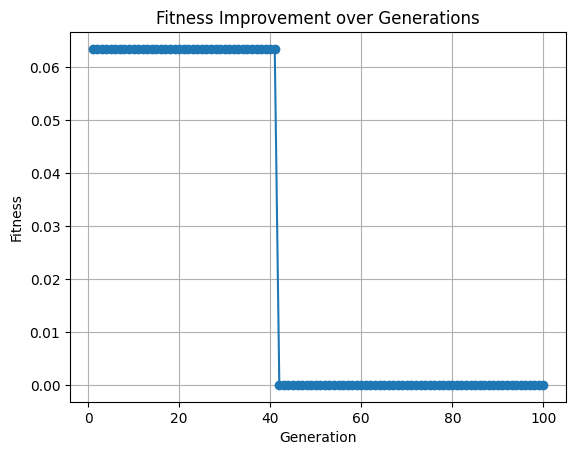

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

popn_size = 100
bit_len = 9
mut_rate = 0.2
gen = 100

def fitness_function(x):
    x_real = decode_binary(x)
    return abs(x_real**2 - 4*x_real + 3)

def decode_binary(x):
    sign_bit = int(x[0])
    integer_part = int(x[1:4], 2)
    fractional_part = int(x[4:], 2) / 2**5
    x_real = (-1)**sign_bit * (integer_part + fractional_part)
    return x_real

def initialize_population(population_size):
    population = []
    for _ in range(population_size):
        individual = ''.join(random.choice('01') for _ in range(bit_len))
        population.append(individual)
    return population

def two_point_crossover(parent1, parent2):
    point1 = random.randint(1, bit_len - 2)
    point2 = random.randint(point1, bit_len - 1)
    child1 = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
    child2 = parent2[:point1] + parent1[point1:point2] + parent2[point2:]
    return child1, child2

def mutate(individual):
    mutated_individual = list(individual)
    for i in range(bit_len):
        if random.random() < mut_rate:
            mutated_individual[i] = '0' if individual[i] == '1' else '1'
    return ''.join(mutated_individual)

def roulette_wheel_selection(population, fitness_values):
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    pointer = random.random()
    cumulative_prob = 0
    for i, prob in enumerate(probabilities):
        cumulative_prob += prob
        if pointer <= cumulative_prob:
            return population[i]

def genetic_algorithm():
    population = initialize_population(popn_size)
    best_fitnesses = []
    for generation in range(gen):
        fitness_values = [fitness_function(x) for x in population]
        parent1 = roulette_wheel_selection(population, fitness_values)
        parent2 = roulette_wheel_selection(population, fitness_values)
        child1, child2 = two_point_crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        population.sort(key=lambda x: fitness_function(x))
        population[-2] = child1
        population[-1] = child2
        best_individual = min(population, key=fitness_function)
        best_fitness = fitness_function(best_individual)
        best_fitnesses.append(best_fitness)
    best_individual = min(population, key=fitness_function)
    best_solution = decode_binary(best_individual)
    return best_individual, best_solution, best_fitnesses

best_individual, best_solution, best_fitnesses = genetic_algorithm()
best_fitness = fitness_function(best_individual)

print(f"Best individual found: {best_individual}")
print(f"Decoded best solution: x = {best_solution}, Fitness = {best_fitness}")

plt.figure()
plt.plot(range(1, gen + 1), best_fitnesses, marker='o')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Improvement over Generations')
plt.grid(True)
plt.show()
